The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
student_df = pd.read_csv("Student_Performance.csv")
student_df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
# number of rows and columns
student_df.shape

(10000, 6)

In [4]:
print(student_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None


**DATA VISUALIZATION**

Distribution of previous scores compared to performance index

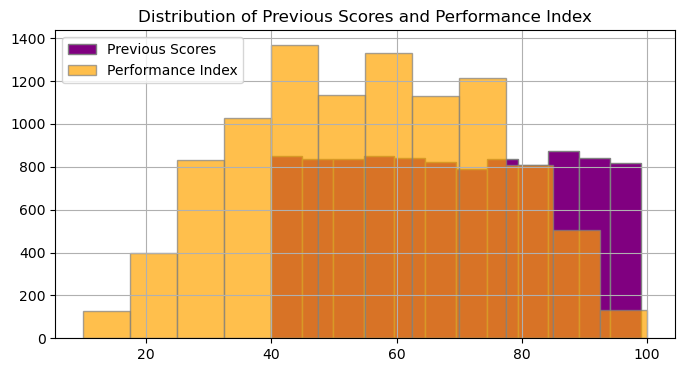

In [5]:
plt.figure(figsize=(8, 4))

student_df["Previous Scores"].hist(edgecolor="gray", bins=12, color="purple")
student_df["Performance Index"].hist(edgecolor="gray", bins=12, color="orange", alpha=0.7)
plt.legend(["Previous Scores", "Performance Index"])
plt.title("Distribution of Previous Scores and Performance Index")
plt.show()

In [6]:
hours = pd.DataFrame(student_df.groupby("Hours Studied")["Performance Index"].mean())
hours.reset_index(inplace=True)
hours.head()

,Hours Studied,Performance Index
0,1,44.116319
1,2,46.428571
2,3,49.776586
3,4,52.719816
4,5,55.516453


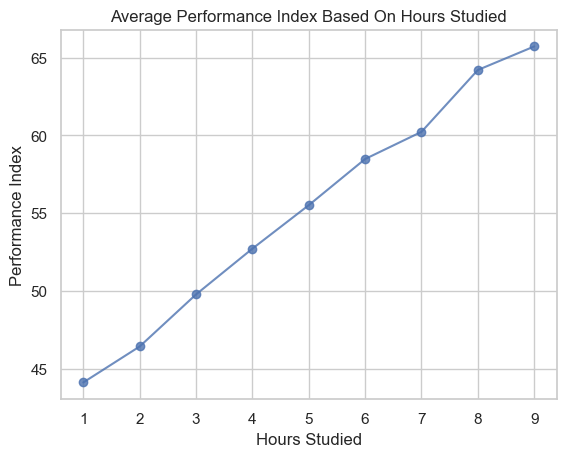

In [7]:
sns.set_theme(style="whitegrid")
plt.plot("Hours Studied", "Performance Index", data=hours, marker="o", alpha=0.8)
plt.ylabel("Performance Index")
plt.xlabel("Hours Studied")
plt.title("Average Performance Index Based On Hours Studied")
plt.show()

Influence of extracurricular activities on performance

In [8]:
activities= pd.DataFrame(student_df.groupby("Extracurricular Activities")["Performance Index"].mean())
activities.reset_index(inplace=True)
activities.head()

,Extracurricular Activities,Performance Index
0,No,54.758511
1,Yes,55.700889


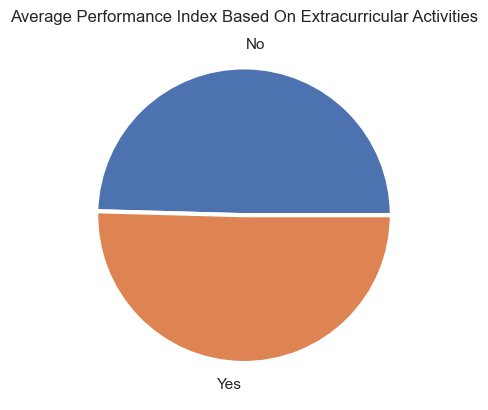

In [9]:
## Same chart as above but with specific wedgeprops option:
plt.pie(activities["Performance Index"], labels=activities["Extracurricular Activities"], labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white'})
plt.title("Average Performance Index Based On Extracurricular Activities")
plt.show()

In [10]:
# Label variable transformation
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the column
student_df['Extracurricular Activities'] = label_encoder.fit_transform(student_df['Extracurricular Activities'])

student_df.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


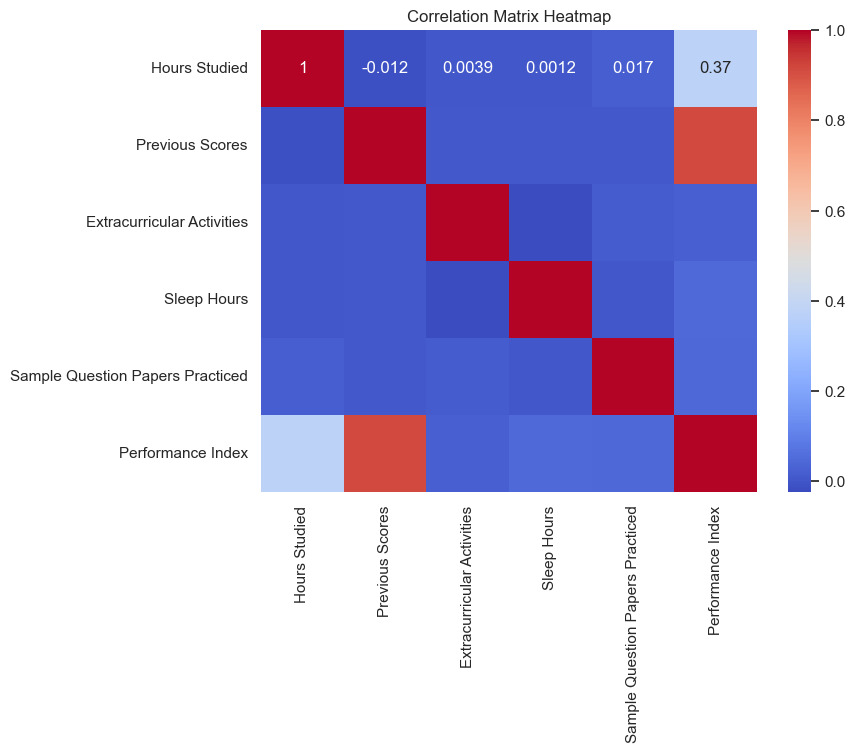

In [11]:
# calculate correlation matrix
corr_matrix = student_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [12]:
# Split into features and labels
X = student_df.drop("Performance Index", axis=1).values
y = student_df['Performance Index'].values
print(X[1:10])

[[ 4 82  0  4  2]
 [ 8 51  1  7  2]
 [ 5 52  1  5  2]
 [ 7 75  0  8  5]
 [ 3 78  0  9  6]
 [ 7 73  1  5  6]
 [ 8 45  1  4  6]
 [ 5 77  0  8  2]
 [ 4 89  0  4  0]]


Splitting the Dataset into Training and Test Sets

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 8)

**Standardization**

To ensure all feastures are on the same scale

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
# Define and fit SVR models
linear_svr = SVR(kernel='linear', C=1).fit(X_train, y_train.ravel())
poly_svr = SVR(kernel='poly', degree=3, C=1).fit(X_train, y_train.ravel())


# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train.ravel())


# Lasso Regression
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train.ravel())

# Random Forest Regression
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train.ravel())


RandomForestRegressor()

In [16]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Linear Regression

In [17]:
linear_reg_preds = linear_reg.predict(X_test)
linear_r2 = r2_score(y_test, linear_reg_preds)
linear_mae = mean_absolute_error(y_test, linear_reg_preds)
linear_mse = mean_squared_error(y_test, linear_reg_preds)
linear_rmse = mean_squared_error(y_test, linear_reg_preds, squared=False)

print("Linear Regression:")
print("R-squared:", linear_r2)
print("Mean Absolute Error:", linear_mae)
print("Mean Squared Error:", linear_mse)
print("Root Mean Squared Error:", linear_rmse)

Linear Regression:
R-squared: 0.9884425672245496
Mean Absolute Error: 1.627463264533771
Mean Squared Error: 4.169894057626048
Root Mean Squared Error: 2.0420318453995883


Lasso Regression

In [18]:
lasso_reg_preds = lasso_reg.predict(X_test)
r2 = r2_score(y_test, lasso_reg_preds)
mae = mean_absolute_error(y_test, lasso_reg_preds)
mse = mean_squared_error(y_test, lasso_reg_preds)
rmse = mean_squared_error(y_test, lasso_reg_preds, squared=False)

print("Lasso Regression:")
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Lasso Regression:
R-squared: 0.9799210551377291
Mean Absolute Error: 2.1520679629359822
Mean Squared Error: 7.2444352038484165
Root Mean Squared Error: 2.6915488484975367


Linear Support Vector Machine

In [19]:
linear_svr_preds = linear_svr.predict(X_test)
r2 = r2_score(y_test, linear_svr_preds)
mae = mean_absolute_error(y_test, linear_svr_preds)
mse = mean_squared_error(y_test, linear_svr_preds)
rmse = mean_squared_error(y_test, linear_svr_preds, squared=False)

print("Linear Support Vector Machine Regression:")
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Linear Support Vector Machine Regression:
R-squared: 0.9884448914324943
Mean Absolute Error: 1.6274801296180625
Mean Squared Error: 4.169055488967639
Root Mean Squared Error: 2.0418265080480364


Polynomial Support Vector Machine

In [20]:
poly_svr_preds = linear_svr.predict(X_test)
r2 = r2_score(y_test, poly_svr_preds)
mae = mean_absolute_error(y_test, poly_svr_preds)
mse = mean_squared_error(y_test, poly_svr_preds)
rmse = mean_squared_error(y_test, poly_svr_preds, squared=False)

print("Polynomial Support Vector Machine Regression:")
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Polynomial Support Vector Machine Regression:
R-squared: 0.9884448914324943
Mean Absolute Error: 1.6274801296180625
Mean Squared Error: 4.169055488967639
Root Mean Squared Error: 2.0418265080480364


Random Forest Regression

In [21]:
rf_reg_preds = rf_reg.predict(X_test)
r2 = r2_score(y_test, rf_reg_preds)
mae = mean_absolute_error(y_test, rf_reg_preds)
mse = mean_squared_error(y_test, rf_reg_preds)
rmse = mean_squared_error(y_test, rf_reg_preds, squared=False)

print("Random Forest Regression:")
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Random Forest Regression:
R-squared: 0.9844765437817246
Mean Absolute Error: 1.8739757566137565
Mean Squared Error: 5.60082581452717
Root Mean Squared Error: 2.3666063919729385


In [22]:
from sklearn.linear_model import LinearRegression
import pickle

# Assuming X_train and y_train are defined
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model using pickle
with open('student_score_prediction_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [23]:
#source code:
https://realpython.com/linear-regression-in-python/
https://www.youtube.com/watch?v=R15LjD8aCzc
https://www.w3schools.com/python/python_ml_linear_regression.asp
https://www.geeksforgeeks.org/linear-regression-python-implementation/
https://www.youtube.com/watch?v=NUXdtN1W1FE 
#videos from the professor posted. 

SyntaxError: invalid syntax (2387293928.py, line 2)